In [1]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    labels="inferred",       # folder names → labels
    label_mode="int",
    image_size=(28, 28),     # resize to MNIST size or whatever you want
    color_mode="grayscale",  # or "rgb"
    batch_size=32,
    shuffle=True
)

# Convert dataset to numpy arrays (similar to MNIST)
import numpy as np

x_train = []
y_train = []

for images, labels in train_ds:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

# Normalize (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0

print("Shape:", x_train.shape)
print("Labels:", y_train.shape)


Found 59099 files belonging to 5 classes.
Shape: (59099, 28, 28, 1)
Labels: (59099,)


In [3]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    validation_split=0.2,     # 80/20 split
    subset="training",
    seed=42,                  # ensures same split every run
    label_mode="int",
    image_size=(28, 28),      # resize to same size as MNIST or your choice
    color_mode="grayscale",   # or "rgb"
    batch_size=None,          # important: gives Numpy-like tensors
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode="int",
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=None
)

Found 59099 files belonging to 5 classes.
Using 47280 files for training.
Found 59099 files belonging to 5 classes.
Using 11819 files for validation.


In [4]:
# Convert train set
x_train = []
y_train = []

for img, label in train_ds:
    x_train.append(img.numpy())
    y_train.append(label.numpy())

import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)

# Convert test set
x_test = []
y_test = []

for img, label in test_ds:
    x_test.append(img.numpy())
    y_test.append(label.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# ---------------------------------------------------------
# 4. Create tf.data Datasets (exactly like MNIST example)
# ---------------------------------------------------------
ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

ds_train = ds_train.shuffle(10000).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(128).prefetch(tf.data.AUTOTUNE)

Training data shape: (47280, 28, 28, 1)
Test data shape: (11819, 28, 28, 1)


In [7]:
# ---------------------------------------------------------
# 5. Build the same model you used for MNIST
# ---------------------------------------------------------
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),   # include channel for grayscale
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # adjust number of classes if needed
])

In [8]:
# ---------------------------------------------------------
# 6. Compile the model
# ---------------------------------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [9]:
# ---------------------------------------------------------
# 7. Train
# ---------------------------------------------------------
model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.5338 - sparse_categorical_accuracy: 0.3360 - val_loss: 1.4254 - val_sparse_categorical_accuracy: 0.4105
Epoch 2/6
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4198 - sparse_categorical_accuracy: 0.4092 - val_loss: 1.3937 - val_sparse_categorical_accuracy: 0.4187
Epoch 3/6
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3806 - sparse_categorical_accuracy: 0.4266 - val_loss: 1.3584 - val_sparse_categorical_accuracy: 0.4393
Epoch 4/6
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3514 - sparse_categorical_accuracy: 0.4426 - val_loss: 1.3410 - val_sparse_categorical_accuracy: 0.4424
Epoch 5/6
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3307 - sparse_categorical_accuracy: 0.4513 - val_loss: 1.3498 - val_sparse_categorical_accuracy: 0.4421
Epoch 6/6
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3137 - sparse_categorical_accuracy: 0.4572 - val_loss: 1.3230 - val_sparse_categorical_accuracy: 0.4531


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Classes: ['Angry', 'Fear', 'Happy', 'Sad', 'Suprise']


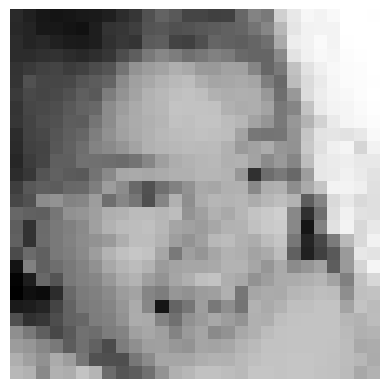

Predicted class: 2  (Happy)
Actual class:     2  (Happy)
----------------------------------------


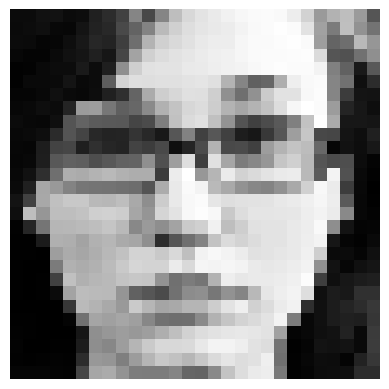

Predicted class: 3  (Sad)
Actual class:     1  (Fear)
----------------------------------------


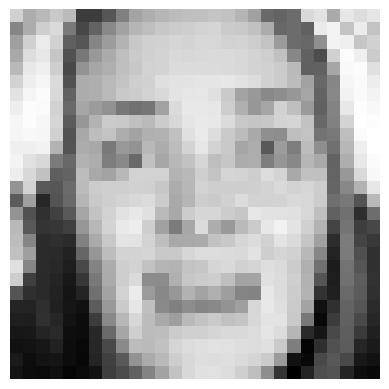

Predicted class: 2  (Happy)
Actual class:     1  (Fear)
----------------------------------------


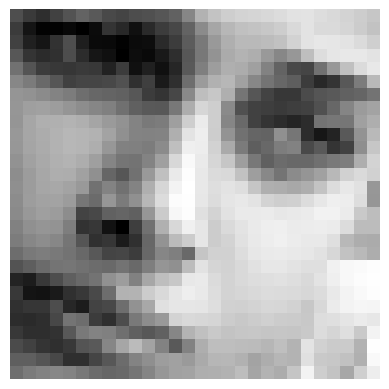

Predicted class: 2  (Happy)
Actual class:     3  (Sad)
----------------------------------------


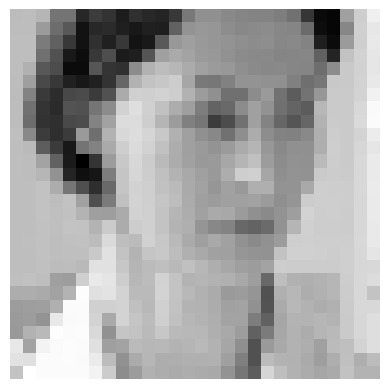

Predicted class: 2  (Happy)
Actual class:     3  (Sad)
----------------------------------------


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# How many images you want to visualize
n_images = 5

# Pick the first n images from your test set
test_images = x_test[:n_images]
test_labels = y_test[:n_images]

# Get predictions from your model
predictions = model.predict(test_images)

# If you want class names (folder names)
class_names = train_ds.class_names
print("Classes:", class_names)

for i in range(n_images):
    img = test_images[i]

    # Remove channel dimension if grayscale
    if img.shape[-1] == 1:
        img = img.reshape(28, 28)

    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis("off")
    plt.show()

    predicted = np.argmax(predictions[i])
    actual = test_labels[i]

    print(f"Predicted class: {predicted}  ({class_names[predicted]})")
    print(f"Actual class:     {actual}  ({class_names[actual]})")
    print("-" * 40)


In [13]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

accuracy = np.mean(predicted_classes == y_test)
print("Accuracy:", accuracy)

370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.45308401726034353
